In [28]:
import pandas as pd
import torch
import torch_geometric
from torch_geometric.data import Dataset, Data
import numpy as np 
from torch_geometric.loader import DataLoader
import os
from torch_geometric.nn import Sequential, GCNConv,GATConv
import matplotlib.pyplot as plt
from torch.nn import Linear
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, accuracy_score
import time
import MyData as data
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression


In [43]:
%%time
data_handler=data.dataset_preparation(root='/lustrehome/federicacuna/TB_Sept_2023_ml/Data/preprocessed')
fname='pi-_10GeV_4ly_1e-4_inclined_NEW_viewx'
data_trk=data_handler.get_more_file(0,100,fname)
data_val=data_handler.get_more_file(300,350,fname)
train_dataset=data_trk

file 31 not found
file 81 not found
taking a list of file from  0  to  100
file 304 not found
taking a list of file from  300  to  350
CPU times: user 3min 23s, sys: 6.48 s, total: 3min 29s
Wall time: 3min 43s


In [4]:
#data_x=data.get(0)
'''
data_x=[]
for i in range(0,10):
    data_x.append(data.get(i))
'''


'\ndata_x=[]\nfor i in range(0,10):\n    data_x.append(data.get(i))\n'

In [44]:
len(data_trk)
# data_trk[:1000000]

680573

In [19]:
# Seleziona gli elementi per cui l'attributo 'y' è tutto pari a 1
# selected_data = [data for data in data_trk if torch.sum(data.y == 0) >=3]
# print(len(selected_data))
# # data_trk=data.get_more_file(21,22,fname)

18597


In [ ]:
# Seleziona gli elementi per cui l'attributo 'y' è tutto pari a 1
# selected_data_val = [data for data in data.get_more_file(30,35,fname) if torch.sum(data.y == 0) <= 4]
# print(len(selected_data_val))

In [45]:
%%time
#data_x = data_x.shuffle()

# train_dataset = selected_data
'''
val_dataset = data.get(18,fname)+data.get(19,fname)[:2000]

'''
val_dataset=data_val


CPU times: user 25 µs, sys: 2 µs, total: 27 µs
Wall time: 52.5 µs


In [46]:
test_dataset =data_handler.get(160,fname)
len(train_dataset), len(val_dataset), len(test_dataset)

taking the  data_160.pt


(680573, 338076, 6924)

0.5197469583291374
0.4802530416708625
CPU times: user 627 ms, sys: 7.86 ms, total: 635 ms
Wall time: 632 ms


<BarContainer object of 2 artists>

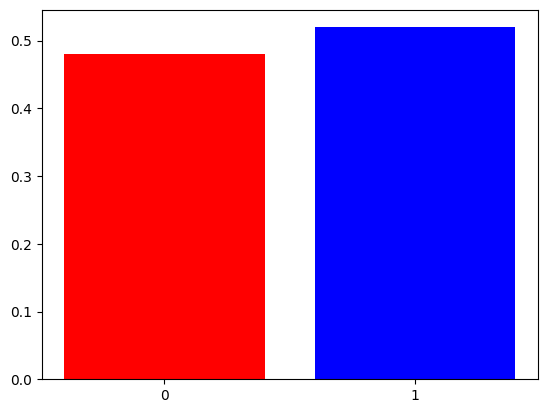

In [105]:
%%time
#check the dataset
y_values = [item for data in train_dataset for item in data.y.tolist()]
total_nodes = sum([len(data.y.tolist()) for data in train_dataset])
count_1 = y_values.count(1)/total_nodes
count_0 = y_values.count(0)/total_nodes

print(count_1)
print(count_0)
# Crea il plot a barre
plt.bar(['0', '1'], [count_0, count_1], color=['red', 'blue'])


In [47]:
torch.__version__

'2.2.2+cu121'

0.48601981182907117
0.5139801881709288
CPU times: user 102 ms, sys: 7.9 ms, total: 110 ms
Wall time: 106 ms


<BarContainer object of 2 artists>

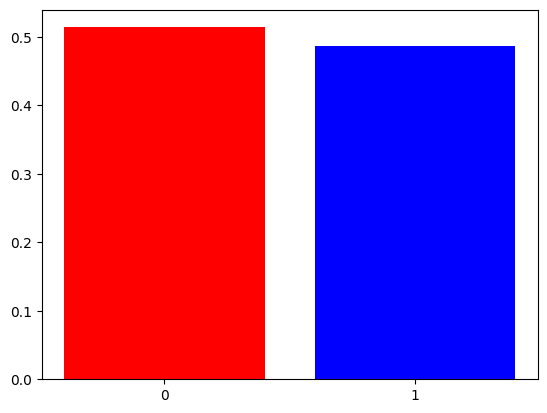

In [106]:
%%time
y_values = [item for data in val_dataset for item in data.y.tolist()]
total_nodes = sum([len(data.y.tolist()) for data in val_dataset])

count_1 = y_values.count(1)/total_nodes
count_0 = y_values.count(0)/total_nodes
print(count_1)
print(count_0)

# Crea il plot a barre
plt.bar(['0', '1'], [count_0, count_1], color=['red', 'blue'])

In [50]:
%%time
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv

NUM_FEATURES = train_dataset[0].x.shape[1]
print(NUM_FEATURES)
NUM_CLASSES =1
HIDDEN_LAYER_SIZE = 256
class SageConv(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Model layers
        self.conv1 = SAGEConv(NUM_FEATURES, HIDDEN_LAYER_SIZE)
        self.conv2 = SAGEConv(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE-64)
        self.conv3 = SAGEConv(HIDDEN_LAYER_SIZE-64, NUM_CLASSES)
        #self.lin_1 = Linear(HIDDEN_LAYER_SIZE, NUM_CLASSES*4)
        #self.lin_2 = Linear(NUM_CLASSES*4, NUM_CLASSES)

    def forward(self, data):
        # The architecture itself
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.tanh(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
       
        #x = self.lin_1(x)
       # x = F.tanh(x)
        #x = self.lin_2(x)
        return F.sigmoid(x)

5
CPU times: user 1.05 ms, sys: 30 µs, total: 1.08 ms
Wall time: 718 µs


In [ ]:
%%time
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv

NUM_FEATURES = train_dataset[0].x.shape[1]
print(NUM_FEATURES)
NUM_CLASSES =1
HIDDEN_LAYER_SIZE = 256
class SageConv2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Model layers
        self.conv1 = SAGEConv(NUM_FEATURES, HIDDEN_LAYER_SIZE)
        self.conv2 = SAGEConv(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE-32)
        self.conv3 = SAGEConv(HIDDEN_LAYER_SIZE-32, HIDDEN_LAYER_SIZE-32)
        self.conv4 = SAGEConv(HIDDEN_LAYER_SIZE-32, HIDDEN_LAYER_SIZE-32)
        self.conv5 = SAGEConv(HIDDEN_LAYER_SIZE-32, NUM_CLASSES)

        #self.lin_1 = Linear(HIDDEN_LAYER_SIZE, NUM_CLASSES*4)
        #self.lin_2 = Linear(NUM_CLASSES*4, NUM_CLASSES)

    def forward(self, data):
        # The architecture itself
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.tanh(x)
        x = self.conv2(x, edge_index)
        x = F.tanh(x)
        x = self.conv3(x, edge_index)
        x = F.tanh(x)
        x = self.conv4(x, edge_index)
        x = F.tanh(x)
        x = self.conv5(x, edge_index)


       
        #x = self.lin_1(x)
       # x = F.tanh(x)
        #x = self.lin_2(x)
        return F.sigmoid(x)

In [9]:
%%time
NUM_FEATURES = train_dataset[0].x.shape[1]
print(NUM_FEATURES)
NUM_CLASSES =1
HIDDEN_LAYER_SIZE = 256

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Model layers
        self.conv1 = GCNConv(NUM_FEATURES, HIDDEN_LAYER_SIZE)
        self.conv2 = GCNConv(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE-64)
        self.conv3 = GCNConv(HIDDEN_LAYER_SIZE-64, NUM_CLASSES)
        #self.lin_1 = Linear(HIDDEN_LAYER_SIZE, NUM_CLASSES*4)
        #self.lin_2 = Linear(NUM_CLASSES*4, NUM_CLASSES)

    def forward(self, data):
        # The architecture itself
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.tanh(x)
        x = self.conv2(x, edge_index)
        x = F.tanh(x)
        x = self.conv3(x, edge_index)
       
        #x = self.lin_1(x)
       # x = F.tanh(x)
        #x = self.lin_2(x)
        return F.sigmoid(x)

5
CPU times: user 62 µs, sys: 105 µs, total: 167 µs
Wall time: 150 µs


In [6]:
%%time
heads=8
class GAT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Model layers
        self.conv1 = GATConv(NUM_FEATURES, HIDDEN_LAYER_SIZE,heads)
        #self.conv2 = GATConv(heads*(HIDDEN_LAYER_SIZE), HIDDEN_LAYER_SIZE,heads=8)
        #self.conv3 = GATConv(heads*(HIDDEN_LAYER_SIZE), NUM_CLASSES,heads=1)
        self.conv2 = GATConv(heads*HIDDEN_LAYER_SIZE, NUM_CLASSES,heads=1)


    def forward(self, data):
        # The architecture itself
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
       # x = F.tanh(x)
       # x = self.conv3(x, edge_index)
     
        #x = self.lin_1(x)
       # x = F.tanh(x)
        #x = self.lin_2(x)
        return F.sigmoid(x)    

CPU times: user 63 µs, sys: 0 ns, total: 63 µs
Wall time: 83.7 µs


In [51]:
%%time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device=torch.device('cpu')
print('Using device:', device)

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')


Using device: cuda
NVIDIA A100-PCIE-40GB MIG 1g.5gb
Memory Usage:
Allocated: 0.0 GB
Cached:    2.3 GB
CPU times: user 504 µs, sys: 0 ns, total: 504 µs
Wall time: 508 µs


In [52]:
%%time
model = SageConv().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
####criterion = torch.nn.CrossEntropyLoss()
criterion=torch.nn.functional.binary_cross_entropy#for sageconv

CPU times: user 3.26 ms, sys: 1.9 ms, total: 5.16 ms
Wall time: 4.31 ms


In [53]:
def train_model(train_data):
    model.to(device)
    model.train()
    for data in train_data:
        data.to(device,non_blocking=True)
        out = model(data) # Perform a single forward pass.
        labels=data.y.float().to(device)
        loss = criterion(out.squeeze(1).float(), labels)  # Compute the loss.
        
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.
    return model.to(device)

In [54]:
threshold=0.8
def evaluate_model(model,test_data):
    model.eval()
    correct = 0
    total_samples = 0
    model_outputs = []
    targets = []
    pred_class=[]

    for data in test_data:
        data.to(device)
        model_output = model(data)
        model_output.to(device)
        predicted_class = torch.where(model_output > threshold, 1, 0)
        
        correct += int((predicted_class == data.y.float()).sum())
        total_samples += len(data.y)

          # store these to get the loss
        model_outputs.extend(model_output.tolist())
        targets.extend(data.y.float().tolist())
        pred_class.extend(predicted_class.tolist())

    
    loss = criterion(torch.tensor(model_outputs).squeeze(1), torch.tensor(targets).float())
    accuracy = accuracy_score(targets, pred_class)
    precision = precision_score(targets, pred_class)
    recall = recall_score(targets, pred_class)
    
    return accuracy, loss, recall, precision 

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def train_model2(train_data, val_data=None):
    model.to(device)
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    model_outputs = []
    targets = []
    pred_class = []
    threshold=0.8
    for data in train_data:
        data.to(device)
        out = model(data) # Perform a single forward pass.
        labels = data.y.float().to(device)
        loss = criterion(out.squeeze(1).float(), labels)  # Compute the loss.
        
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

        # Calculate metrics
        total_loss += loss.item()
        predicted_class = torch.where(out > threshold, 1, 0)
        correct = int((predicted_class == data.y.float()).sum())
        total_correct += correct
        total_samples += len(data.y)

        # Store outputs and targets for evaluation
        model_outputs.extend(out.tolist())
        targets.extend(data.y.float().tolist())
        pred_class.extend(predicted_class.tolist())

    accuracy = accuracy_score(targets, pred_class)
    precision = precision_score(targets, pred_class)
    recall = recall_score(targets, pred_class)
    avg_loss = total_loss / len(train_data)

    if val_data:
        val_accuracy, val_loss, val_recall, val_precision = evaluate_model(model, val_data)
        return model.to(device), accuracy, avg_loss, recall, precision, val_accuracy, val_loss, val_recall, val_precision
    else:
        return model.to(device), accuracy, avg_loss, recall, precision


In [60]:
%%time
train_loader = DataLoader(train_dataset, batch_size=1000,shuffle=True,pin_memory=True,num_workers=16) 
val_loader=DataLoader(val_dataset, batch_size=1000,shuffle=True,pin_memory=True,num_workers=16) 
test_loader=DataLoader(test_dataset, batch_size=64,shuffle=True)

CPU times: user 0 ns, sys: 305 µs, total: 305 µs
Wall time: 319 µs


In [61]:
%%time
train_accuracies = []
validation_accuracies = []
validation_losses = []
train_losses = []

val_recall=[]
val_precision=[]
train_recall=[]
train_precision=[]
times = []
n_ly=4
for epoch in range(1, 2):
    start = time.time()
    print(epoch)
    model = train_model(train_loader)
    print(next(model.parameters()).is_cuda)
    
    train_acc, train_loss, train_rec, train_prec = evaluate_model(model,train_loader)
    train_losses.append(train_loss)
                   
    val_acc, val_loss, val_rec, val_prec = evaluate_model(model,val_loader)
    validation_losses.append(val_loss)

    train_accuracies.append(train_acc)
    validation_accuracies.append(val_acc)
    
    train_precision.append(train_prec)
    train_recall.append(train_rec)
    
    val_precision.append(val_prec)
    val_recall.append(val_rec)

    # save the model if it is the better than any previous ones
    if val_loss.item() <= min(validation_losses).item():
        torch.save(model, f'/lustrehome/federicacuna/TB_Sept_2023_ml/Code/Pytorch_gnn/best_model_sageconv_yz_{n_ly}.pkl')
        print(f'Epoch_stop: {epoch}')
          
    #torch.save(model, "best_model.pkl")
    if epoch % 1 == 0:
        print(f'Epoch: {epoch}, Train Acc: {train_acc:.4f}, Train Loss: {train_loss:.4f}, Val Acc: {val_acc:.4f}, Val Loss: {val_loss:.4f}, time :{time.time() - start}')
    times.append(time.time() - start)
  

1
True
Epoch_stop: 1
Epoch: 1, Train Acc: 0.9438, Train Loss: 0.1363, Val Acc: 0.9426, Val Loss: 0.1393, time :104.48088049888611
CPU times: user 1min 56s, sys: 30.6 s, total: 2min 26s
Wall time: 1min 44s


In [27]:
%%time
train_accuracies = []
validation_accuracies = []
validation_losses = []
train_losses = []

val_recall=[]
val_precision=[]
train_recall=[]
train_precision=[]
times = []
n_ly=4
for epoch in range(1, 2):
    start = time.time()
    print(epoch)
    model,train_acc, train_loss, train_rec, train_prec,val_acc, val_loss, val_rec, val_prec  = train_model2(train_loader,val_loader)
    # print(next(model.parameters()).is_cuda)
    
    train_losses.append(train_loss)
    validation_losses.append(val_loss)

    train_accuracies.append(train_acc)
    validation_accuracies.append(val_acc)
    
    train_precision.append(train_prec)
    train_recall.append(train_rec)
    
    val_precision.append(val_prec)
    val_recall.append(val_rec)

    # save the model if it is the better than any previous ones
    if val_loss.item() <= min(validation_losses).item():
        torch.save(model, f'/lustrehome/federicacuna/TB_Sept_2023_ml/Code/Pytorch_gnn/best_model_sageconv_yz_{n_ly}.pkl')
        print(f'Epoch_stop: {epoch}')
          
    #torch.save(model, "best_model.pkl")
    if epoch % 1 == 0:
        print(f'Epoch: {epoch}, Train Acc: {train_acc:.4f}, Train Loss: {train_loss:.4f}, Val Acc: {val_acc:.4f}, Val Loss: {val_loss:.4f}, time :{time.time() - start}')
    times.append(time.time() - start)

1
Epoch_stop: 1
Epoch: 1, Train Acc: 0.8696, Train Loss: 0.2738, Val Acc: 0.8512, Val Loss: 0.2744, time :2.0514402389526367
CPU times: user 7.64 s, sys: 144 ms, total: 7.79 s
Wall time: 2.05 s


In [ ]:
best_validation_loss = min(validation_losses)
best_epoch = validation_losses.index(best_validation_loss)
accuracy_at_best_epoch = validation_accuracies[best_epoch]
recall_at_best_epoch=val_recall[best_epoch]
precision_at_best_epoch=val_precision[best_epoch]
print(f"The best result was achieved after {best_epoch} epochs with a validation accuracy of {accuracy_at_best_epoch:.4f} and a loss of {best_validation_loss:.4f}")
print(f"The validation recall is {recall_at_best_epoch:.4f} and the precision is {precision_at_best_epoch:.4f}")

NameError: name 'best_epoch' is not defined

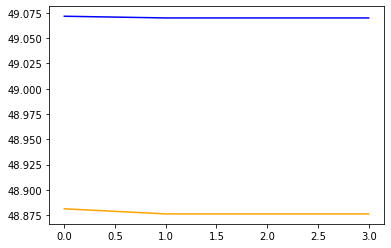

In [334]:
fig, ax = plt.subplots()
#fig.set_size_inches(30.5, 15.5)

plt.plot(validation_losses,color='orange',label='validation loss')
plt.plot(train_losses,color='blue',label='training loss')

plt.axvline(x=best_epoch, color="green", linewidth=2, linestyle='dashed',label='best epoch')
#plt.legend(['Val Loss', 'Train Loss', "Best Epoch"])
plt.legend()


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Model training and validation loss per epoch", fontsize=10, fontweight='bold')
#plt.ylim(0.05,0.2)
plt.savefig('model_loss_sageconv2.png')
plt.show()

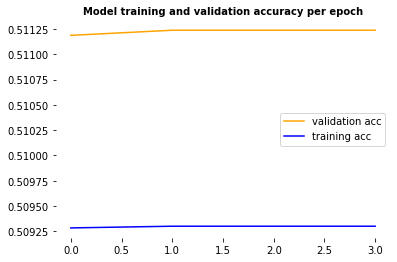

In [335]:
fig, ax = plt.subplots()
#fig.set_size_inches(30.5, 15.5)

plt.plot(validation_accuracies,color='orange',label='validation acc')
plt.plot(train_accuracies,color='blue',label='training acc')

plt.legend()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Model training and validation accuracy per epoch", fontsize=10, fontweight='bold')
# plt.ylim(0.9,1)
plt.savefig('model_acc_sageconv2.png')
plt.show()

In [442]:
best_model = torch.load("/lustrehome/federicacuna/TB_Sept_2023_ml/Code/Pytorch_gnn/best_model_sageconv_v2_4.pkl")
best_model.to(device) 

correct = 0
total_samples = 0
pred_test_cl=[]
targets=[]
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)  
        model_output = best_model(data)
        predicted_class =  torch.where(model_output > 0.8, 1, 0)
        pred_test_cl.extend(predicted_class.tolist())
        correct += int((predicted_class == data.y).sum())
        targets.extend(data.y.tolist())
        total_samples += data.y.size(0)

print('accuracy ',accuracy_score(targets,pred_test_cl),' recall ', recall_score(targets,pred_test_cl),' precision ',precision_score(targets,pred_test_cl))


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument tensors in method wrapper_CUDA_cat)

In [ ]:
'''
test_batch=next(iter(test_loader))
test_batch
'''

In [443]:
for ev_id in range(100,101):
    test_batch=test_dataset[ev_id]
    print(ev_id,' ',test_batch)

100   Data(x=[4, 5], edge_index=[2, 3], edge_attr=[3, 2], y=[4])


In [444]:
ev_id=108
test_batch=test_dataset[ev_id]
print(ev_id,' ',test_batch)

108   Data(x=[4, 5], edge_index=[2, 3], edge_attr=[3, 2], y=[4])


In [445]:
#predict the output
test_batch.to(device) 
model_output = best_model(test_batch) 
model_output.to(device)
predicted_class = torch.where(model_output > 0.8, 1, 0)
#calculate the accuracy
print(accuracy_score(predicted_class.detach().cpu(), test_batch.y.detach().cpu())) 

1.0


In [461]:
test_batch=test_batch.detach().cpu()
ly=test_batch.x[:,2]
x=test_batch.x[:,0]
z_hit=test_batch.x[:,3]
label=test_batch.y
label_pred=predicted_class

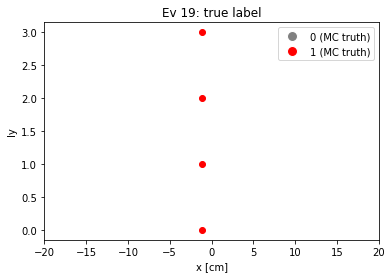

In [462]:
for i in range(len(x)):
    if label[i] == 0:
        plt.scatter(x[i], ly[i], color='grey', label='0')
    else:
        plt.scatter(x[i], ly[i], color='red', label='1')
plt.xlim(-20,20)
plt.xlabel('x [cm]')
plt.ylabel('ly')
plt.title(f'Ev {ev_id}: true label')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='0 (MC truth)', markerfacecolor='grey', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='1 (MC truth)', markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')

# plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img/1million_sage_conv/true_label_ev{ev_id}')

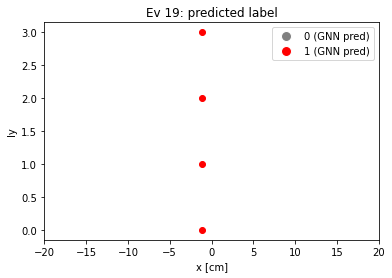

In [463]:
x_pred=[]
y_pred=[]
z_pred=[]
for i in range(len(x)):
    if label_pred[i] == 0:
        plt.scatter(x[i], ly[i], color='grey', label='0 (Pred)')
    else:
        x_pred.append(x[i].item())
        y_pred.append(ly[i].item())
        z_pred.append(z_hit[i].item())
       
        plt.scatter(x[i], ly[i], color='red', label='1 (Pred)')
plt.xlim(-20,20)
#plt.legend()
plt.xlabel('x [cm]')
plt.ylabel('ly')
plt.title(f'Ev {ev_id}: predicted label')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='0 (GNN pred)', markerfacecolor='grey', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='1 (GNN pred)', markerfacecolor='red', markersize=10)]

plt.legend(handles=legend_elements, loc='upper right')
# plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img/1million_sage_conv/pred_label_ev{ev_id}')
plt.show()

In [375]:
'''
df_pivoted = df.pivot_table(index='ev', columns='ly', values='x_hit').add_prefix('x_hit').reset_index()
df_pivoted_x_hit = df.pivot_table(index='ev', columns='ly', values='x_hit').add_prefix('x_hit').reset_index()
df_pivoted_ly = df.pivot_table(index='ev', columns='ly', values='ly').add_prefix('ly').reset_index()

# Unione dei due DataFrame
df_final = pd.merge(df_pivoted_x_hit, df_pivoted_ly, on='ev')
'''